# Gayathri Reddy Patlolla - Assignment 2 - Applied Data Science 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Loading the Dataset 
df=pd.read_csv('titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


male      577
female    314
Name: sex, dtype: int64


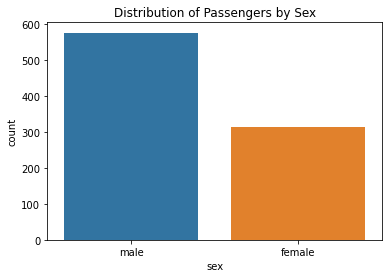

In [15]:
#Univariate Analysis 
# Frequency distribution of 'Sex'
sex_counts = df['sex'].value_counts()
print(sex_counts)

# Bar plot for 'Sex' distribution
sns.countplot(x='sex', data=df)
plt.title('Distribution of Passengers by Sex')
plt.show()


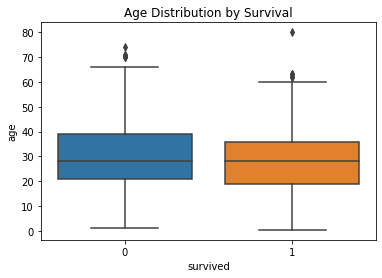

In [17]:
#Bivariate analysis
# Box plot of 'Age' by 'Survived'
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

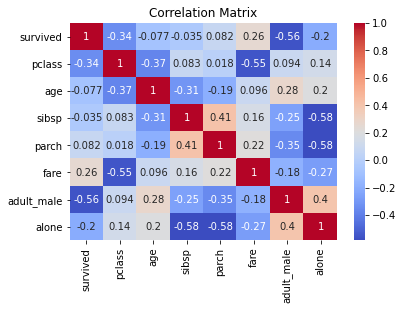

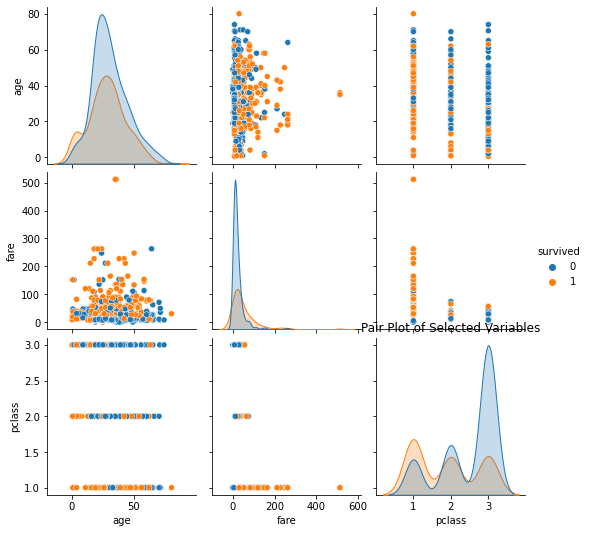

In [23]:
# Multivariate Analysis

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pair plot of selected variables
selected_vars = ['survived', 'age', 'fare', 'pclass']
sns.pairplot(data=df[selected_vars].dropna(), hue='survived')
plt.title('Pair Plot of Selected Variables')
plt.show()

In [22]:
# descriptive statistics on the dataset 

descriptive_stat = df.describe()
print(descriptive_stat)

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [25]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Handling missing values

# Drop rows with missing values
df_dropna = df.dropna()
print("After dropping rows with missing values:")
print(df_dropna.isnull().sum())

# Fill missing values with mean age
mean_age = df['age'].mean()
df_fillna_mean = df.fillna({'age': mean_age})
print("After filling missing values with mean age:")
print(df_fillna_mean.isnull().sum())

# Fill missing values with mode embarked
mode_embarked = df['embarked'].mode()[0]
df_fillna_mode = df.fillna({'embarked': mode_embarked})
print("After filling missing values with mode embarked:")
print(df_fillna_mode.isnull().sum())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
After dropping rows with missing values:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64
After filling missing values with mean age:
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
After filling missing values with mode embarked:
su

C:\Users\gayat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

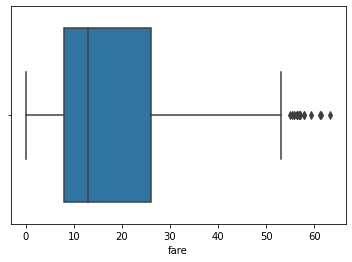

In [35]:
# Find the outliers and replace the outliers

# Outlier Detection
sns.boxplot(df.fare)


In [36]:
perc99=df.fare.quantile(0.99)
perc99

57.01958399999998

C:\Users\gayat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

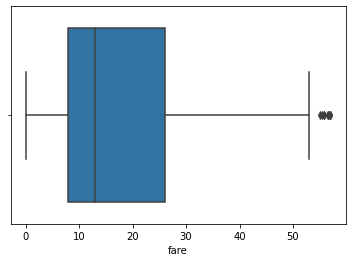

In [37]:
df=df[df.<=perc99]
sns.boxplot(df.fare)

In [38]:
# Check for categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:")
print(categorical_cols)

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Encoded DataFrame:")
print(df_encoded.head())

Categorical Columns:
Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')
Encoded DataFrame:
   survived  pclass   age  sibsp  parch     fare  adult_male  alone  sex_male  \
0         0       3  22.0      1      0   7.2500        True  False         1   
2         1       3  26.0      0      0   7.9250       False   True         0   
3         1       1  35.0      1      0  53.1000       False  False         0   
4         0       3  35.0      0      0   8.0500        True   True         1   
6         0       1  54.0      0      0  51.8625        True   True         1   

   embarked_Q  ...  who_woman  deck_B  deck_C  deck_D  deck_E  deck_F  deck_G  \
0           0  ...          0       0       0       0       0       0       0   
2           0  ...          1       0       0       0       0       0       0   
3           0  ...          1       0       1       0       0       0       0   
4           0  ...          0       0       0       0     

In [72]:
#Split the data into dependent and independent variables. 

X = df.drop("survived", axis=1)  # Independent variables (features)
y = df["survived"]               # Dependent variable (target)

# Print the shape of the datasets
print("Shape of X:",X.shape)
print("Shape of y:",y.shape)

Shape of X: (593, 14)
Shape of y: (593,)


In [83]:
# Scale the independent variables 

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Split the dataset into dependent and independent variables
X = df.drop("survived", axis=1)  # Independent variables (features)

# Preprocess the features

# Identify numerical and categorical columns
numeric_cols = X.select_dtypes(include='number').columns
categorical_cols = X.select_dtypes(include='object').columns

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', MinMaxScaler(), numeric_cols),
        ('categorical', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the data
X_scaled = preprocessor.fit_transform(X)

# Convert the scaled array back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)

# Print the first few rows of the scaled DataFrame
print(X_scaled_df.head())



    0         1      2    3         4    5    6    7    8    9   ...   21  \
0  1.0  0.271174  0.125  0.0  0.014151  0.0  1.0  0.0  0.0  1.0  ...  0.0   
1  0.0  0.472229  0.125  0.0  0.139136  1.0  0.0  1.0  0.0  0.0  ...  0.0   
2  1.0  0.321438  0.000  0.0  0.015469  1.0  0.0  0.0  0.0  1.0  ...  0.0   
3  0.0  0.434531  0.125  0.0  0.103644  1.0  0.0  0.0  0.0  1.0  ...  0.0   
4  1.0  0.434531  0.000  0.0  0.015713  0.0  1.0  0.0  0.0  1.0  ...  0.0   

    22   23   24   25   26   27   28   29   30  
0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  
1  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  
2  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  
3  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
4  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  

[5 rows x 31 columns]


In [84]:
# Split data into training and testing 

from sklearn.model_selection import train_test_split

In [96]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (712, 14) (712,)
Testing set shape: (179, 14) (179,)


In [97]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: survived, Length: 179, dtype: int64

In [98]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: survived, Length: 712, dtype: int64

In [100]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
331,1,male,45.5,0,0,28.5000,S,First,man,True,C,Southampton,no,True
733,2,male,23.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
382,3,male,32.0,0,0,7.9250,S,Third,man,True,NaN,Southampton,no,True
704,3,male,26.0,1,0,7.8542,S,Third,man,True,NaN,Southampton,no,False
813,3,female,6.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False


In [101]:
X_test.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
709,3,male,NaN,1,1,15.2458,C,Third,man,True,NaN,Cherbourg,yes,False
439,2,male,31.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
840,3,male,20.0,0,0,7.9250,S,Third,man,True,NaN,Southampton,no,True
720,2,female,6.0,0,1,33.0000,S,Second,child,False,NaN,Southampton,yes,False
39,3,female,14.0,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False
